In [1]:
library(AnnotationDbi)

source("../tools/formating/formating.R")

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: IRanges

Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The f

In [2]:
inupt_path <- "/ps/ai-ready/data/filtered_gene_bc_matrices/hg19/"
path_of_scrublet_calls<-"../tools/qc/scrublet_calls.tsv"

In [3]:
sce <- LoadSCE(inupt_path)
sce

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


class: SingleCellExperiment 
dim: 32738 2700 
metadata(0):
assays(2): counts logcounts
rownames(32738): MIR1302-10 FAM138A ... AC002321.2 AC002321.1
rowData names(0):
colnames(2700): AAACATACAACCAC-1 AAACATTGAGCTAC-1 ... TTTGCATGAGAGGC-1
  TTTGCATGCCTCAC-1
colData names(4): orig.ident nCount_RNA nFeature_RNA ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

In [4]:
altExp(sce, "ERCC") <- sce[grep("^ERCC-", rownames(sce)), ]
sce <- sce[grep("^ERCC-", rownames(sce), invert=T), ]
sce

class: SingleCellExperiment 
dim: 32738 2700 
metadata(0):
assays(2): counts logcounts
rownames(32738): MIR1302-10 FAM138A ... AC002321.2 AC002321.1
rowData names(0):
colnames(2700): AAACATACAACCAC-1 AAACATTGAGCTAC-1 ... TTTGCATGAGAGGC-1
  TTTGCATGCCTCAC-1
colData names(4): orig.ident nCount_RNA nFeature_RNA ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(1): ERCC

In [7]:
library(EnsDb.Hsapiens.v86)
ENSDB <- "EnsDb.Hsapiens.v86"
library(org.Hs.eg.db)
EGDB <- "org.Hs.eg.db"
ensdb_genes <- genes(get(ENSDB))
MT_names <- ensdb_genes[seqnames(ensdb_genes) == "MT"]$gene_id
is_mito <- rownames(sce) %in% MT_names
table(is_mito)

Loading required package: ensembldb

Loading required package: GenomicFeatures

Loading required package: AnnotationFilter


Attaching package: 'ensembldb'


The following object is masked from 'package:stats':

    filter






is_mito
FALSE 
32738 

In [8]:
rowData(sce)$SYMBOL <- rownames(sce)
print("Remove all genes for which no symbols were found.")
sce <- sce[! is.na(rowData(sce)$SYMBOL),] # Remove all genes for which no symbols were found
print("Check if we can find mitochondrial proteins in the newly annotated symbols.")
grep("^MT-", rowData(sce)$SYMBOL, value=T) # Check if we can find mitochondrial proteins in the newly annotated symbols
grep("^RP[LS]", rowData(sce)$SYMBOL, value=T)
grep("ATP8", rowData(sce)$SYMBOL, value=T) # Quick search for mitochondrial protein ATP8, which is also called MT-ATP8

[1] "Remove all genes for which no symbols were found."
[1] "Check if we can find mitochondrial proteins in the newly annotated symbols."


[1] "MT-ND1"  "MT-ND2"  "MT-CO1"  "MT-CO2"  "MT-ATP8" "MT-ATP6" "MT-CO3" 
 [8] "MT-ND3"  "MT-ND4L" "MT-ND4"  "MT-ND5"  "MT-ND6"  "MT-CYB"

[1] "RPL22"          "RPL11"          "RPS6KA1"        "RPS8"          
  [5] "RPL5"           "RPS27"          "RPS10P7"        "RPS6KC1"       
  [9] "RPS7"           "RPS27A"         "RPL31"          "RPL37A"        
 [13] "RPL32"          "RPL15"          "RPSA"           "RPL14"         
 [17] "RPL29"          "RPL24"          "RPL22L1"        "RPL39L"        
 [21] "RPL35A"         "RPL9"           "RPL34-AS1"      "RPL34"         
 [25] "RPS3A"          "RPL37"          "RPS23"          "RPS14"         
 [29] "RPL26L1"        "RPS18"          "RPS10-NUDT3"    "RPS10"         
 [33] "RPL10A"         "RPL7L1"         "RPS12"          "RPS6KA2"       
 [37] "RPS6KA2-AS1"    "RPS6KA3"        "RPS4X"          "RPS6KA6"       
 [41] "RPL36A"         "RPL36A-HNRNPH2" "RPL39"          "RPL10"         
 [45] "RPS20"          "RPL7"           "RPL30"          "RPL8"          
 [49] "RPS6"           "RPL35"          "RPL12"          "RPL7A"         
 [53] "RPS24"          "RPLP2"          "RPL27A"         "RPS13"         
 [57] "RPS6KA4"        "RPS6KB2"        "RPS3"           "RPS25"         
 [61] "RPS26"          "RPL41"          "RPL6"           "RPLP0"         
 [65] "RPL21"          "RPL10L"         "RPS29"          "RPL36AL"       
 [69] "RPS6KL1"        "RPS6KA5"        "RPS27L"         "RPL4"          
 [73] "RPLP1"          "RPS17"          "RPS17L"         "RPL3L"         
 [77] "RPS2"           "RPS15A"         "RPL13"          "RPL26"         
 [81] "RPL23A"         "RPL23"          "RPL19"          "RPL27"         
 [85] "RPS6KB1"        "RPL38"          "RPL17-C18orf32" "RPL17"         
 [89] "RPS21"          "RPS15"          "RPL36"          "RPS28"         
 [93] "RPL18A"         "RPSAP58"        "RPS16"          "RPS19"         
 [97] "RPL18"          "RPL13A"         "RPS11"          "RPS9"          
[101] "RPL28"          "RPS5"           "RPS4Y1"         "RPS4Y2"        
[105] "RPL3"           "RPS19BP1"

[1] "ATP8B2"  "ATP8A1"  "ATP8A2"  "ATP8B4"  "ATP8B1"  "ATP8B3"  "MT-ATP8"

DataFrame with 6 rows and 9 columns
                       sum  detected subsets_Mito_sum subsets_Mito_detected
                 <numeric> <integer>        <numeric>             <integer>
AAACATACAACCAC-1      2421       781                0                     0
AAACATTGAGCTAC-1      4903      1352                0                     0
AAACATTGATCAGC-1      3149      1131                0                     0
AAACCGTGCTTCCG-1      2639       960                0                     0
AAACCGTGTATGCG-1       981       522                0                     0
AAACGCACTGGTAC-1      2164       782                0                     0
                 subsets_Mito_percent altexps_ERCC_sum altexps_ERCC_detected
                            <numeric>        <numeric>             <integer>
AAACATACAACCAC-1                    0                0                     0
AAACATTGAGCTAC-1                    0                0                     0
AAACATTGATCAGC-1                    0           

DataFrame with 6 rows and 2 columns
                   mean  detected
              <numeric> <numeric>
MIR1302-10   0.00000000  0.000000
FAM138A      0.00000000  0.000000
OR4F5        0.00000000  0.000000
RP11-34P13.7 0.00000000  0.000000
RP11-34P13.8 0.00000000  0.000000
AL627309.1   0.00333333  0.333333

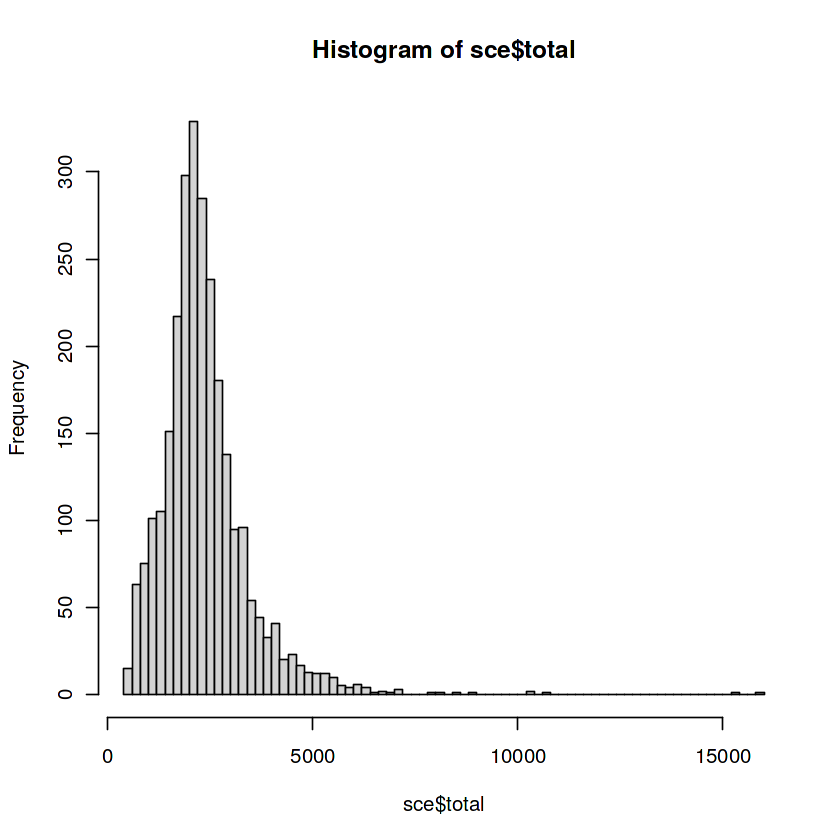

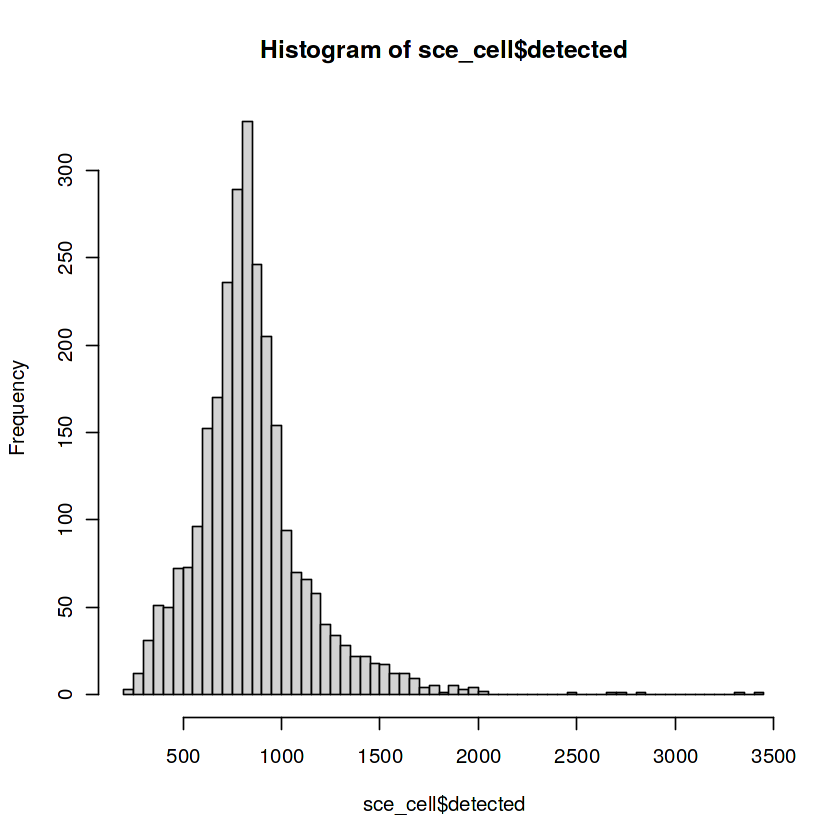

In [9]:
sce_cell <- perCellQCMetrics(sce,subsets=list(Mito=is_mito))
sce_feature <- perFeatureQCMetrics(sce)

head(sce_cell)
head(sce_feature)

sce <- addPerCellQC(sce, subsets=list(Mito=is_mito))
sce <- addPerFeatureQC(sce)

hist(
    sce$total,
    breaks = 100
)
abline(v = 25000, col = "red")

hist(
  sce_cell$detected,
  breaks = 100
)
abline(v = 7000, col = "red")

low_lib_size            low_n_features high_subsets_Mito_percent 
                       79                        97                         0 
high_altexps_ERCC_percent                   discard 
                        0                       102

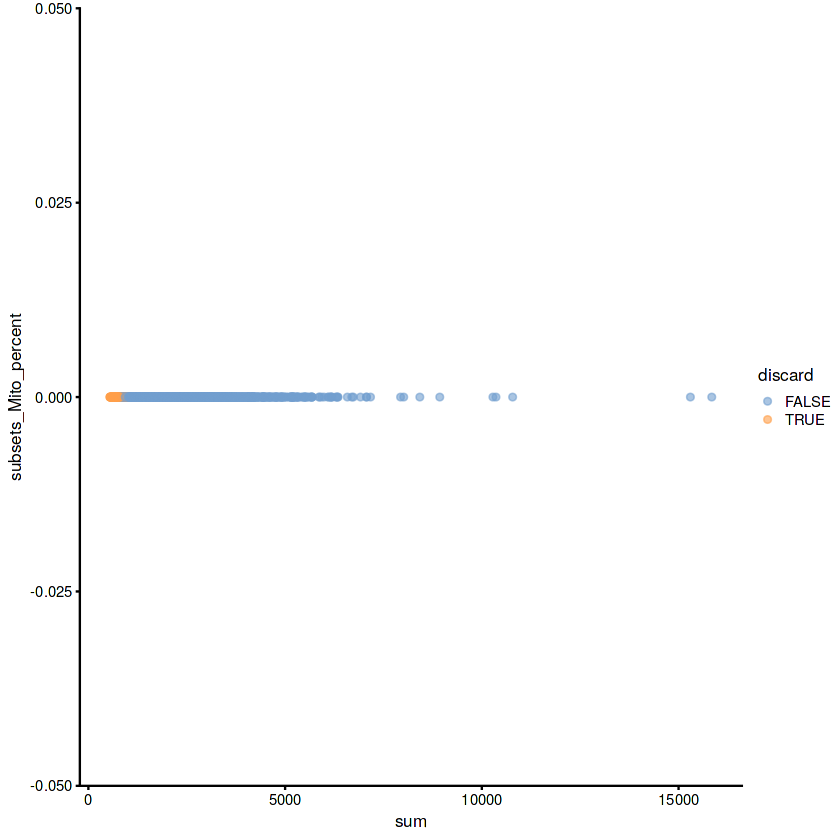

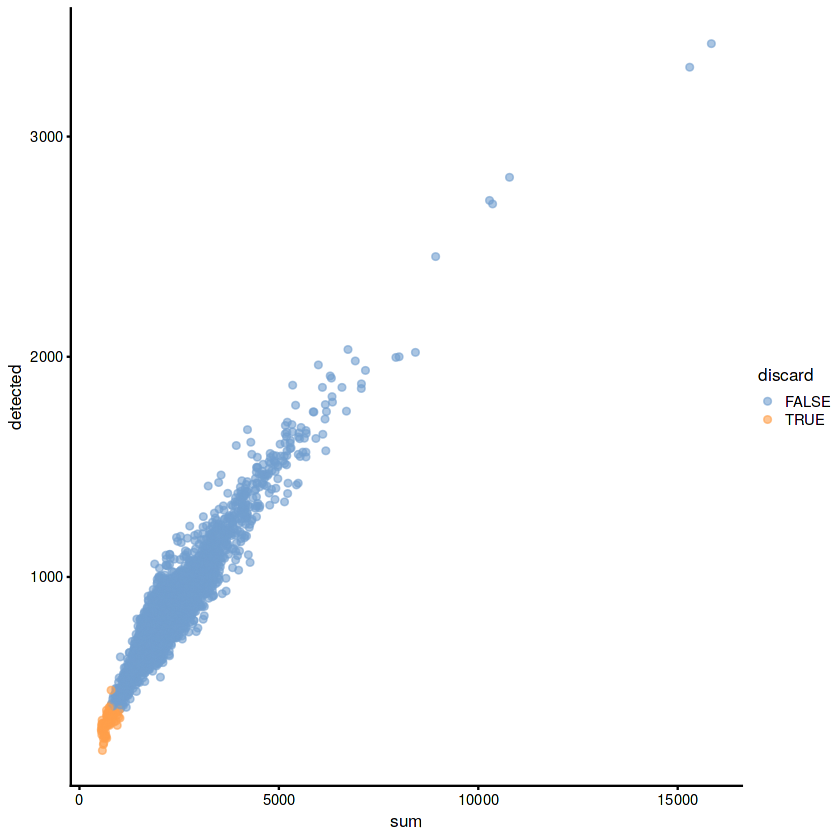

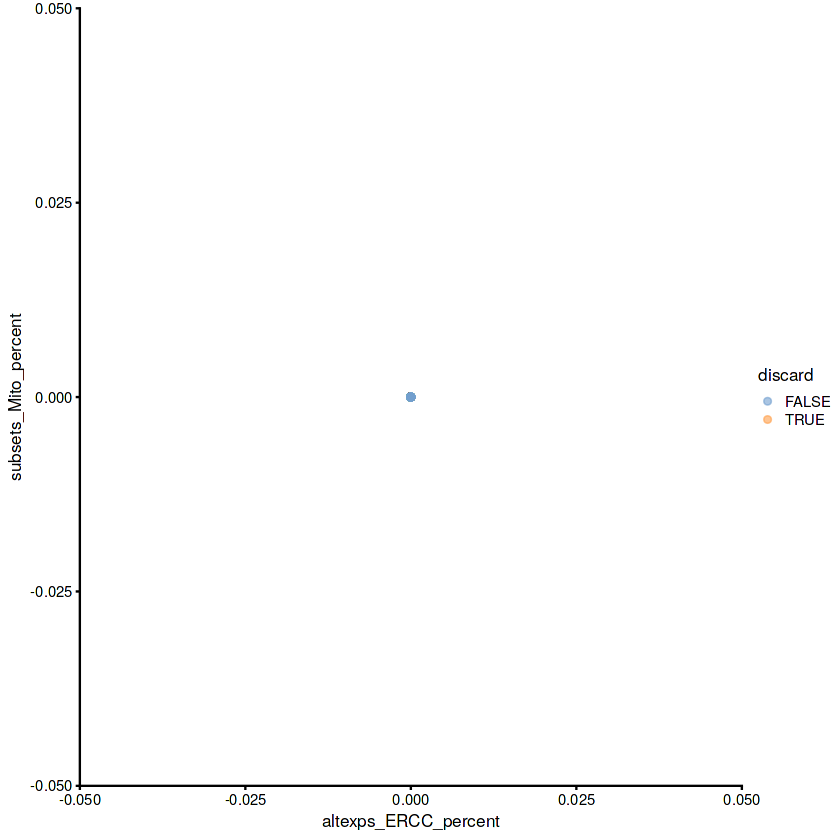

In [12]:
reasons <- quickPerCellQC(sce_cell, sub.fields=c("subsets_Mito_percent", "altexps_ERCC_percent"))
colSums(as.matrix(reasons))
sce$discard <- reasons$discard

plotColData(sce, x="sum", y="subsets_Mito_percent", colour_by="discard")

plotColData(sce, x="sum", y="detected", colour_by="discard")

plotColData(sce, x="altexps_ERCC_percent", y="subsets_Mito_percent",colour_by="discard")

In [29]:
NULL %in% names(rowData(sce))

logical(0)

In [27]:
library(scales)
if("individual" %in% names(rowData(sce))){
  plotColData(sce, x="sum", y="detected", colour_by="discard", other_fields = "individual") + 
    facet_wrap(~individual) + scale_x_continuous(labels = unit_format(unit = "k", scale = 1e-3))
}

if("individual" %in% names(rowData(sce))){
  plotColData(sce, x="sum", y="detected", colour_by="discard", other_fields = "replicate") + 
    facet_wrap(~replicate)  + scale_x_continuous(labels = unit_format(unit = "k", scale = 1e-3))
}

In [ ]:
counts(sce)

In [ ]:
rownames(sce)

In [ ]:
rowData(sce)$SYMBOL <- rownames(sce)

In [ ]:
rowData(sce)

In [ ]:
expression_matrix <- LoadExpressionMatrix(inupt_path)
expression_matrix

In [ ]:
sce <- SingleCellExperiment(expression_matrix)
sce

In [ ]:
srat <- LoadSeurat(inupt_path)
srat

In [ ]:
sce1 <- as.SingleCellExperiment(srat)
sce1

In [ ]:
idtype='SYMBOL'

In [ ]:
print((idtype=='SYMBOL'))